**HIPÓTESIS 1 - REGRESIÓN LINEAL + RANDOM FOREST**

**Importar las librerias necesarias**

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import drive

Cargar el .csv

In [8]:
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/construccion.csv'
df = pd.read_csv(ruta, encoding='latin-1')

print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   sector_id sector_nombre  variable_id         actividad_producto_nombre  \
0         24  Construcción          387  Artículos sanitarios de cerámica   
1         24  Construcción          387  Artículos sanitarios de cerámica   
2         24  Construcción          387  Artículos sanitarios de cerámica   
3         24  Construcción          387  Artículos sanitarios de cerámica   
4         24  Construcción          387  Artículos sanitarios de cerámica   

                 indicador      unidad_de_medida fuente frecuencia_nombre  \
0  ISAC_desestacionalizada  índice base 2004=100  INDEC           Mensual   
1  ISAC_desestacionalizada  índice base 2004=100  INDEC           Mensual   
2  ISAC_desestacionalizada  índice base 2004=100  INDEC           Mensual   
3  ISAC_desestacionalizada  índice base 2004=100  INDEC           Mensual   
4  ISAC_desestacionaliz

**Limpieza**

In [9]:
cols_to_drop = ["sector_id", "sector_nombre", "cobertura_nombre"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

df = df.rename(columns={
    "variable_id": "id_variable",
    "actividad_producto_nombre": "nombre_actividad_producto",
    "frecuencia_nombre": "nombre_frecuencia",
    "alcance_tipo": "tipo_alcance",
    "alcance_id": "id_alcance",
    "alcance_nombre": "nombre_alcance"
})

df = df.dropna(subset=["valor"])
df["valor"] = df["valor"].astype(float)


**Codificar categóricas**

In [11]:
label_cols = ["indice_tiempo","nombre_actividad_producto","nombre_alcance"]
for c in label_cols:
    df[c+"_idx"] = LabelEncoder().fit_transform(df[c])

X = df[[c+"_idx" for c in label_cols]]
y = df["valor"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Modelo 1: Regresión Lineal**

Linear Regression RMSE: 456924.9835361865
Linear Regression R²: 0.0026747779128569737


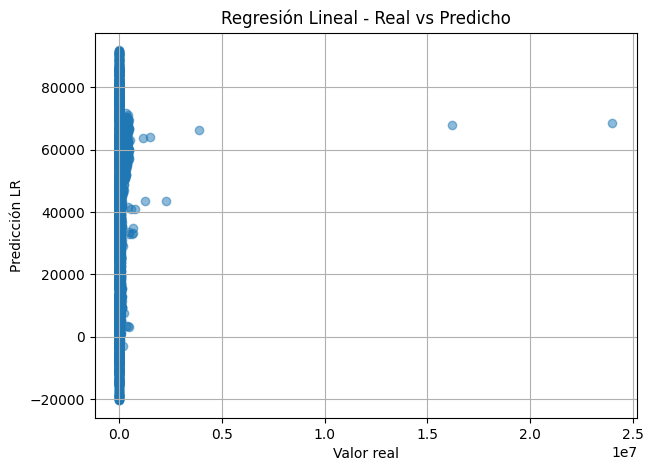

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

print("Linear Regression RMSE:", mean_squared_error(y_test, pred_lr)**0.5)
print("Linear Regression R²:", r2_score(y_test, pred_lr))

plt.figure(figsize=(7,5))
plt.scatter(y_test, pred_lr, alpha=0.5)
plt.xlabel("Valor real")
plt.ylabel("Predicción LR")
plt.title("Regresión Lineal - Real vs Predicho")
plt.grid()
plt.show()

**Modelo 2: Random Forest**

Random Forest RMSE: 490258.6890610532
Random Forest R²: -0.1481472549895766


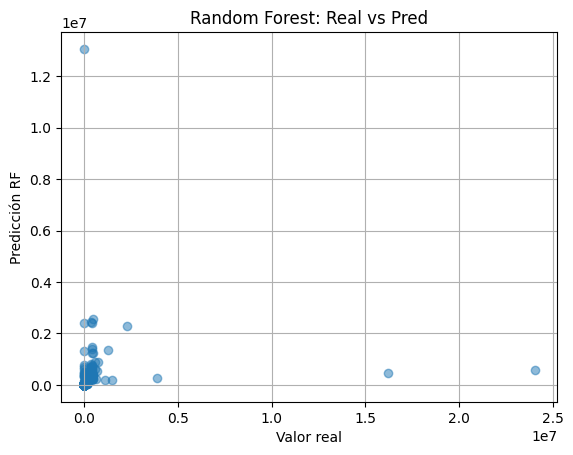

In [13]:
rf = RandomForestRegressor(n_estimators=200, max_depth=20)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("Random Forest RMSE:", mean_squared_error(y_test, pred_rf)**0.5)
print("Random Forest R²:", r2_score(y_test, pred_rf))

plt.scatter(y_test, pred_rf, alpha=0.5)
plt.xlabel("Valor real")
plt.ylabel("Predicción RF")
plt.title("Random Forest: Real vs Pred")
plt.grid()
plt.show()